In [1]:
import pandas as pd

train_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_x.csv')
train_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/train_y.csv')
test_x = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_x.csv')
test_y = pd.read_csv('/mnt/hdd18.2t/sea120424/exchange/ML/datasets/project/test_y.csv')

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

x = train_x.to_numpy()
y = train_y.to_numpy().ravel()
testX = test_x.to_numpy()
testY = test_y.to_numpy().ravel()

In [3]:
# svm_clf = SVC(kernel="linear", C=1.0, cache_size=5000)
# svm_clf.fit(x, y)
# life-time to run, the threshold is 10,000 data

In [4]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [5]:
result = clf.predict(testX)

In [6]:
from sklearn.metrics import mean_squared_error

mean_squared_error(result, testY)

0.11280243550713026

In [32]:
from sklearn.svm import LinearSVC

Linear_clf = LinearSVC(C=1, random_state=42)
Linear_clf.fit(x, y)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, random_state=42)

In [33]:
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

0.11254606633552315

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

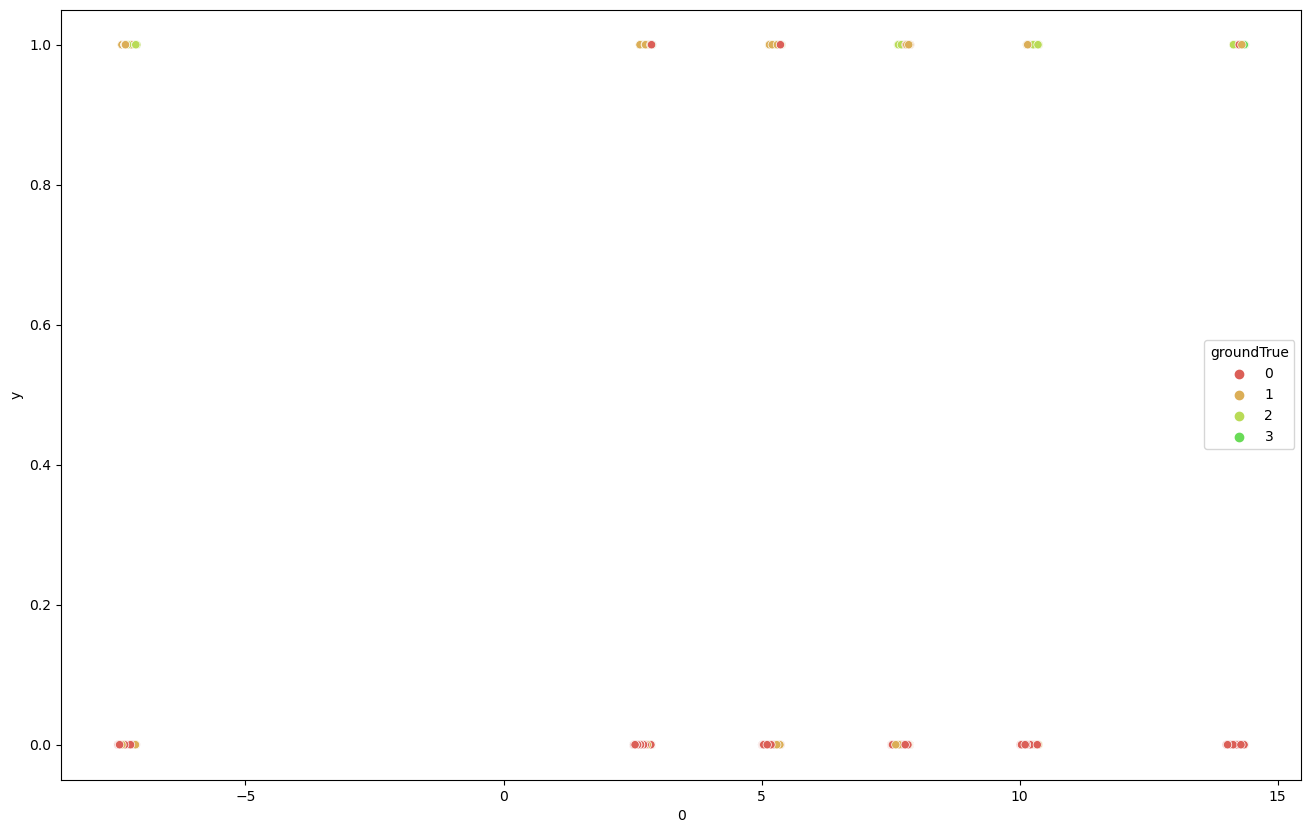

In [34]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [35]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     27490
           1       0.53      0.09      0.16      3509
           2       0.00      0.00      0.00       192
           3       0.00      0.00      0.00        14

    accuracy                           0.89     31205
   macro avg       0.36      0.27      0.28     31205
weighted avg       0.85      0.89      0.85     31205



/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [42]:
Linear_clf = LinearSVC(C=1, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.11254606633552315

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

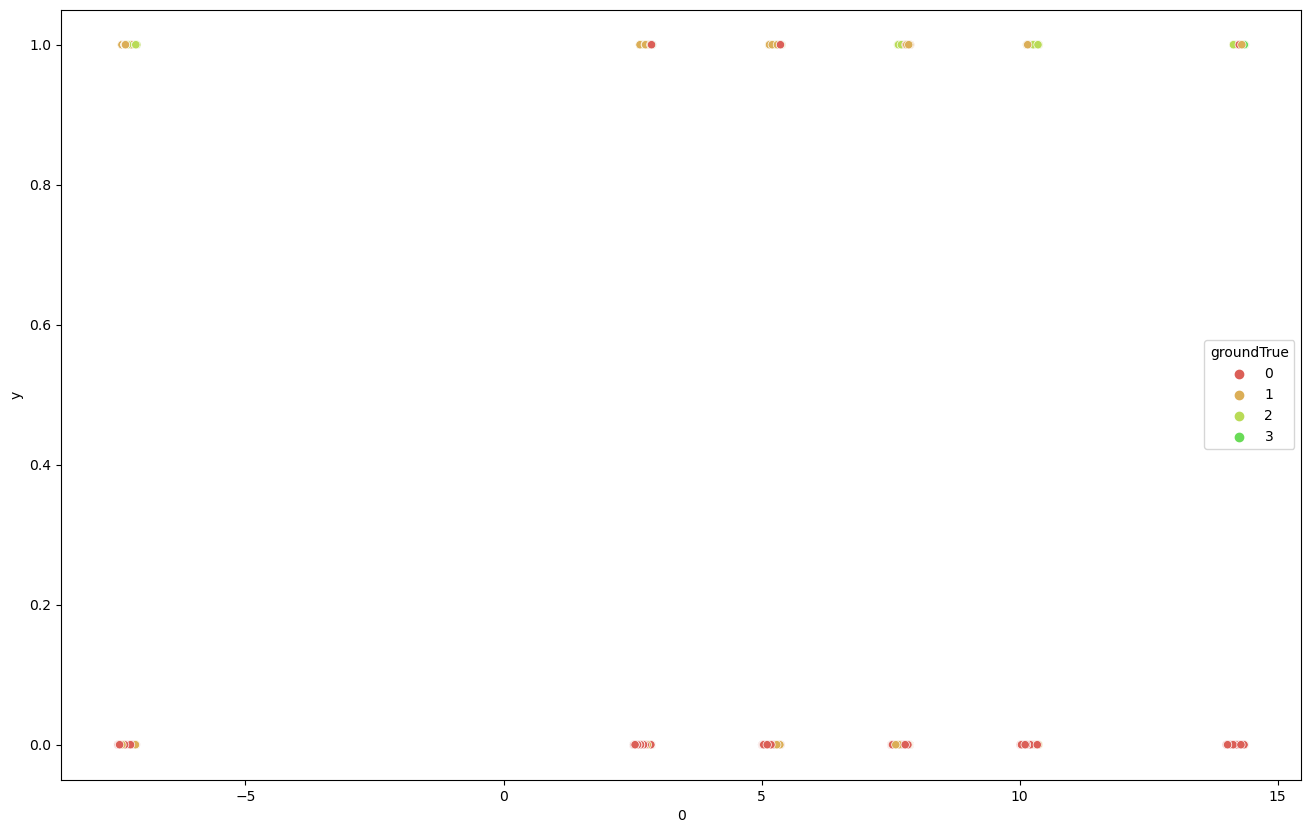

In [43]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [44]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     27490
           1       0.53      0.09      0.16      3509
           2       0.00      0.00      0.00       192
           3       0.00      0.00      0.00        14

    accuracy                           0.89     31205
   macro avg       0.36      0.27      0.28     31205
weighted avg       0.85      0.89      0.85     31205



/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [39]:
Linear_clf = LinearSVC(C=10, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.04697965069700369

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

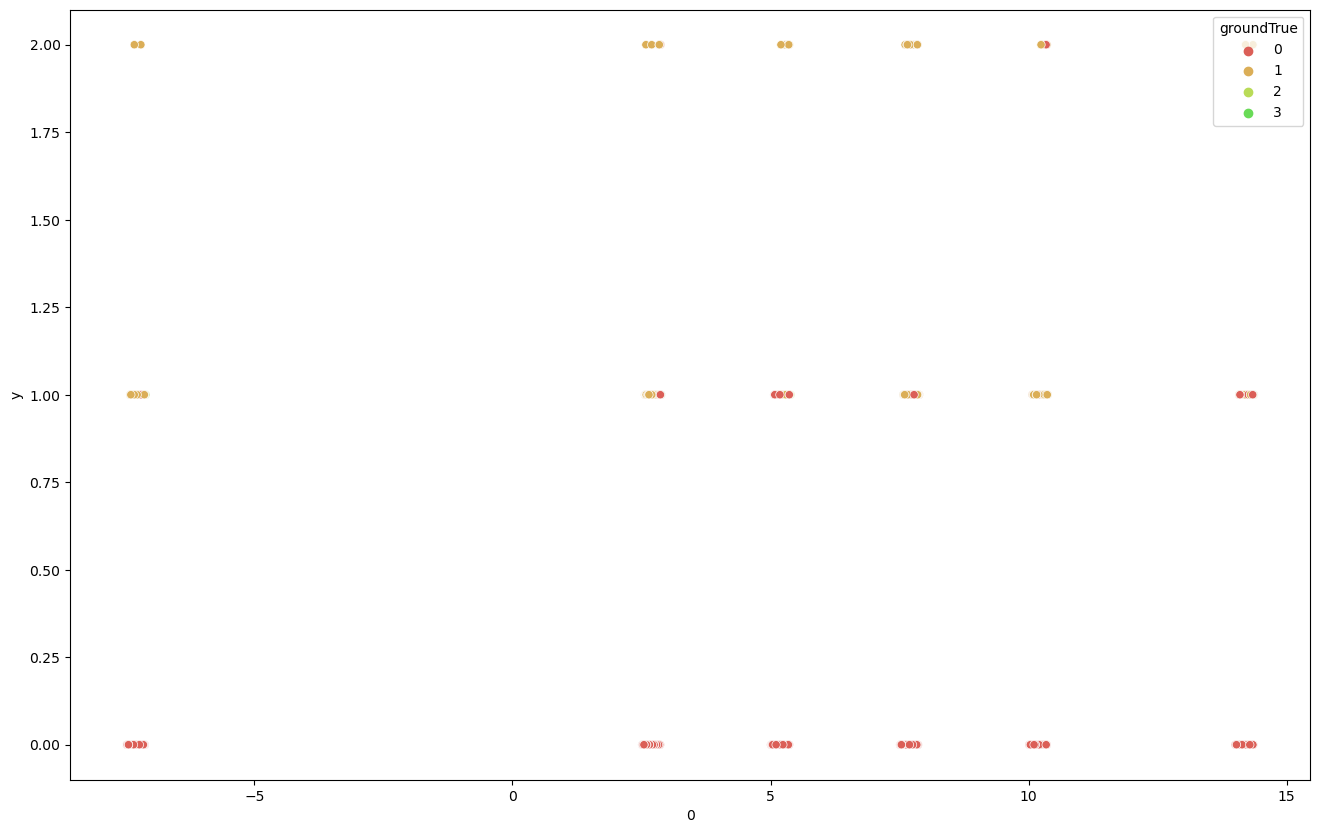

In [40]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [41]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.72      0.99      0.83      3509
           2       0.00      0.00      0.00       192
           3       0.00      0.00      0.00        14

    accuracy                           0.95     31205
   macro avg       0.43      0.49      0.45     31205
weighted avg       0.96      0.95      0.96     31205



/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [36]:
Linear_clf = LinearSVC(C=50, random_state=42)
Linear_clf.fit(x, y)
result = Linear_clf.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.11280243550713026

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

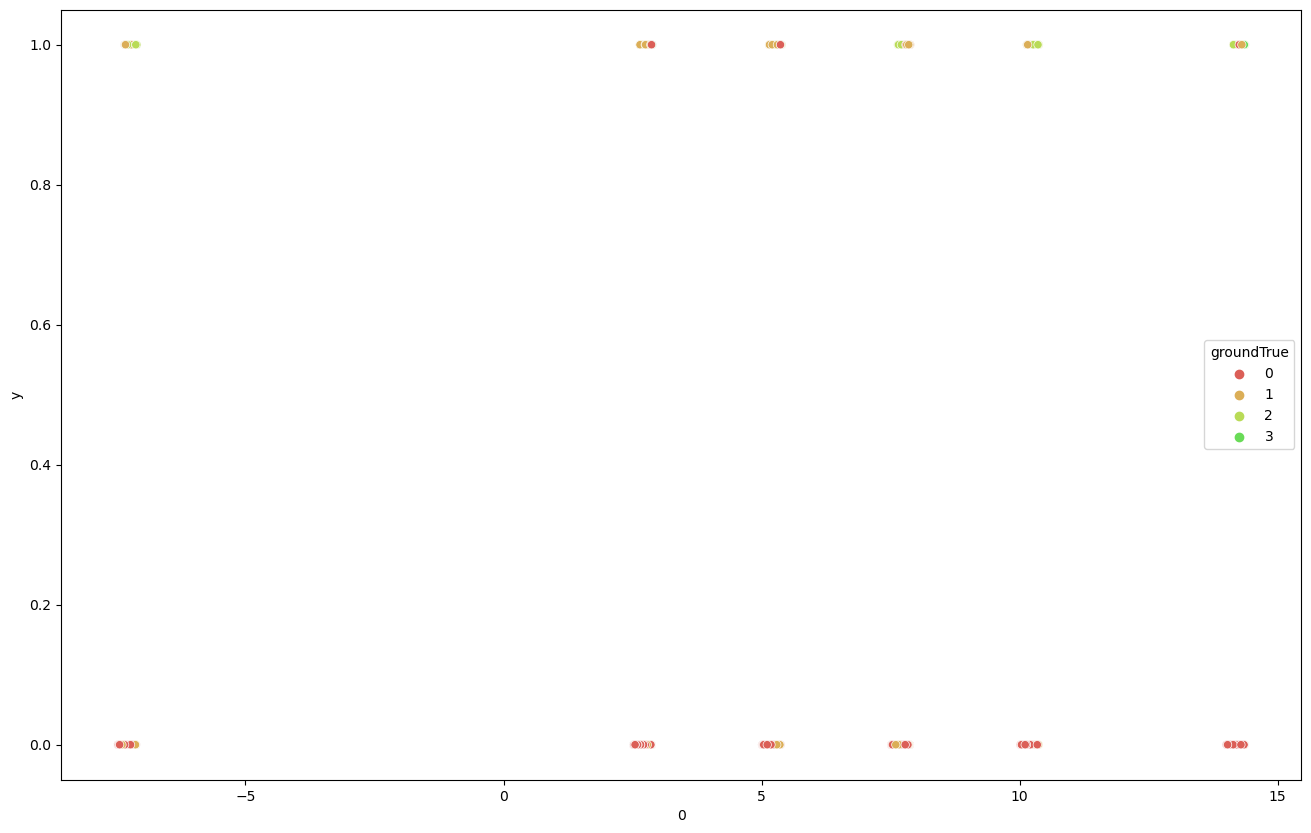

In [37]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [38]:
print(classification_report(testY, result))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     27490
           1       0.53      0.09      0.16      3509
           2       0.00      0.00      0.00       192
           3       0.00      0.00      0.00        14

    accuracy                           0.89     31205
   macro avg       0.36      0.27      0.28     31205
weighted avg       0.85      0.89      0.85     31205



/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [14]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.21944213792557174

In [15]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 


/tmp/ipykernel_1246/774928199.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

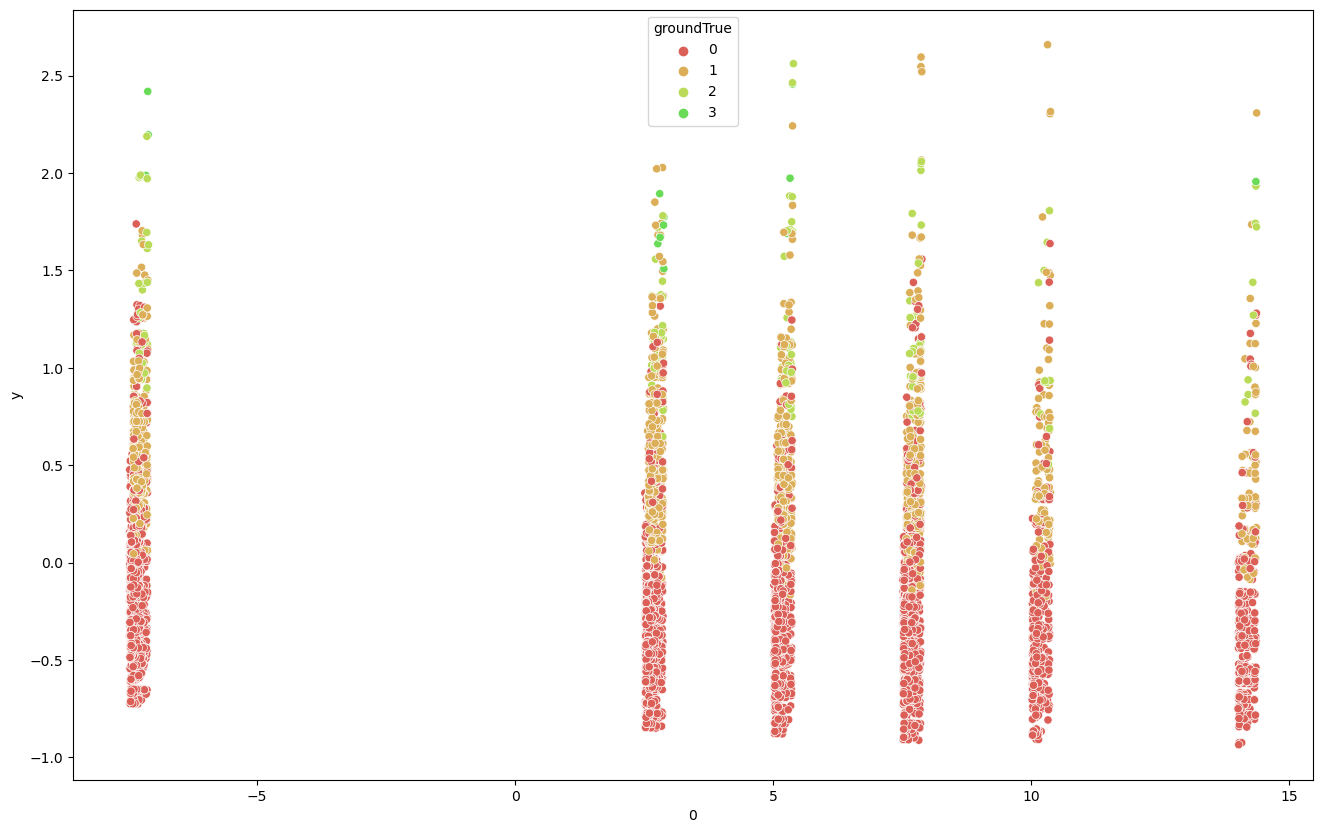

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [17]:
svm_reg = LinearSVR(epsilon=1, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.118713766213388

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

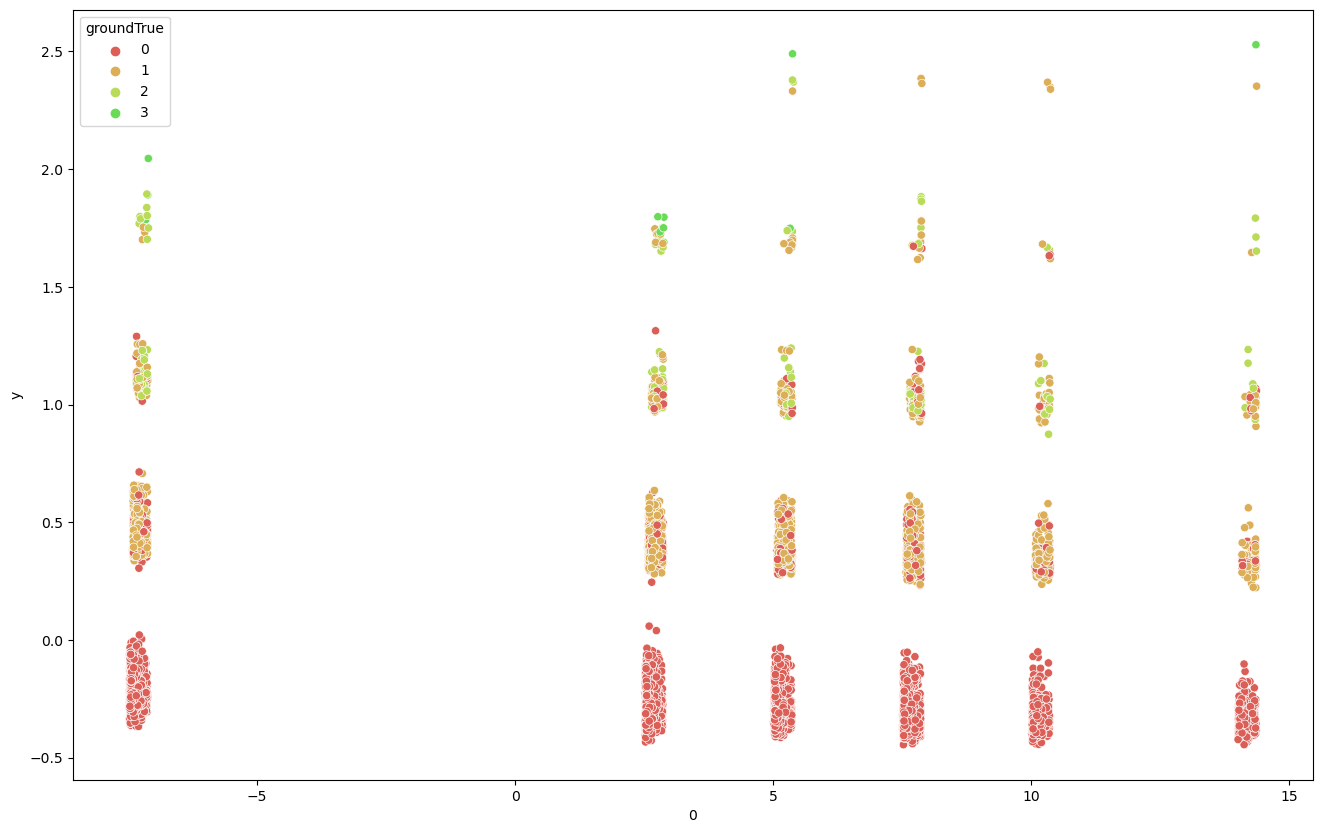

In [18]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [45]:
svm_reg = LinearSVR(epsilon=0, C = 1, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.08857654087027686

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

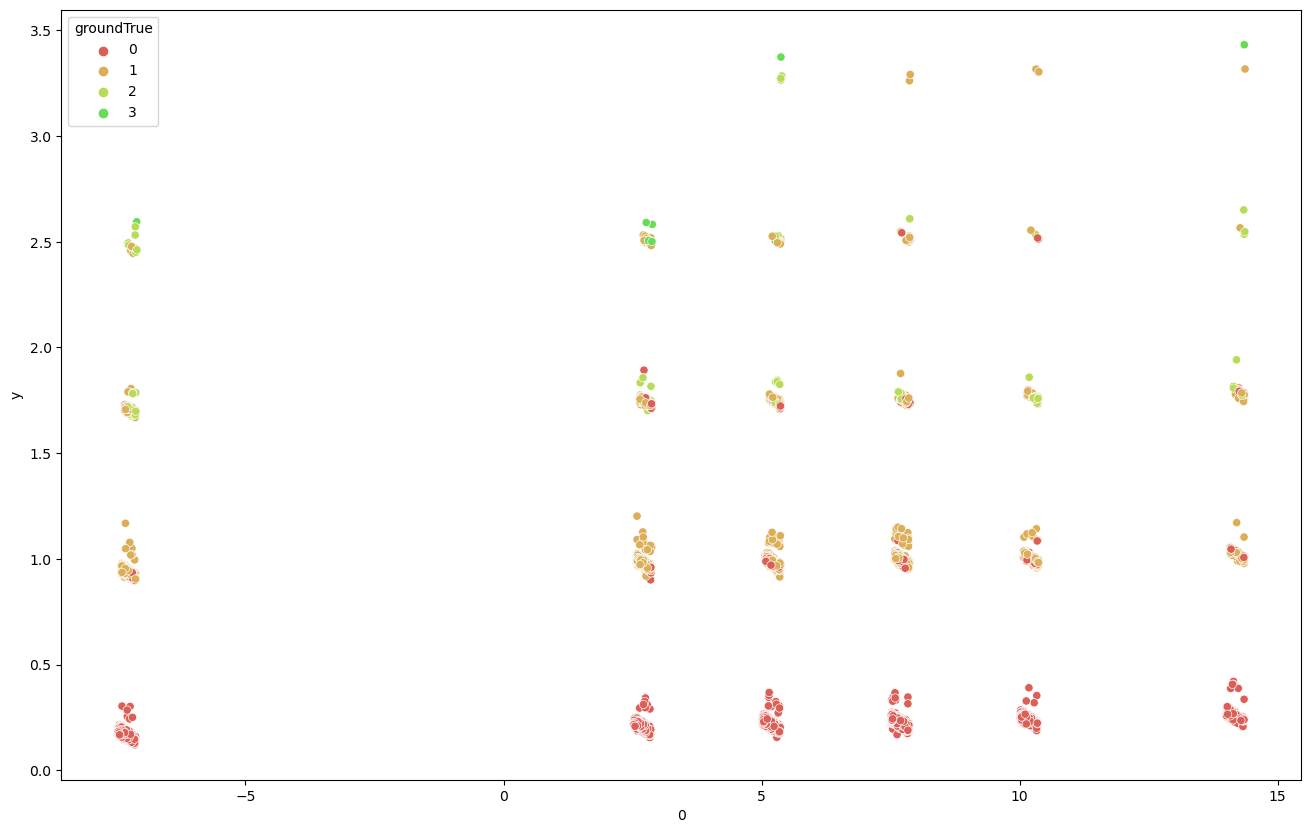

In [46]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [47]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.74      0.91      0.82      3509
           2       0.31      0.88      0.46       192
           3       0.15      0.71      0.25        14

    accuracy                           0.95     31205
   macro avg       0.55      0.86      0.63     31205
weighted avg       0.97      0.95      0.96     31205



In [27]:
svm_reg = LinearSVR(epsilon=0, C = 5, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.03733311379813369

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

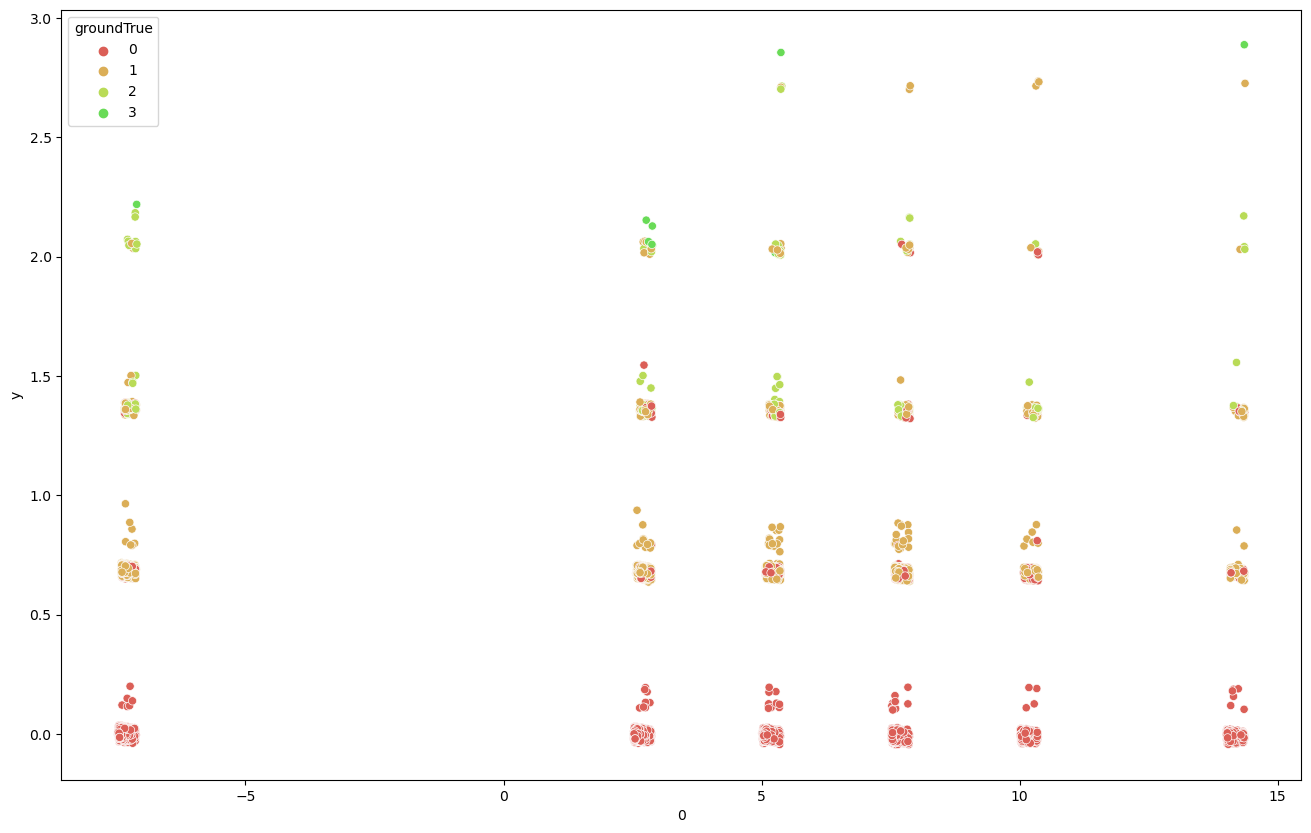

In [28]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [48]:
svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.03733311379813369

/tmp/ipykernel_1246/940411913.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


<AxesSubplot:xlabel='0', ylabel='y'>

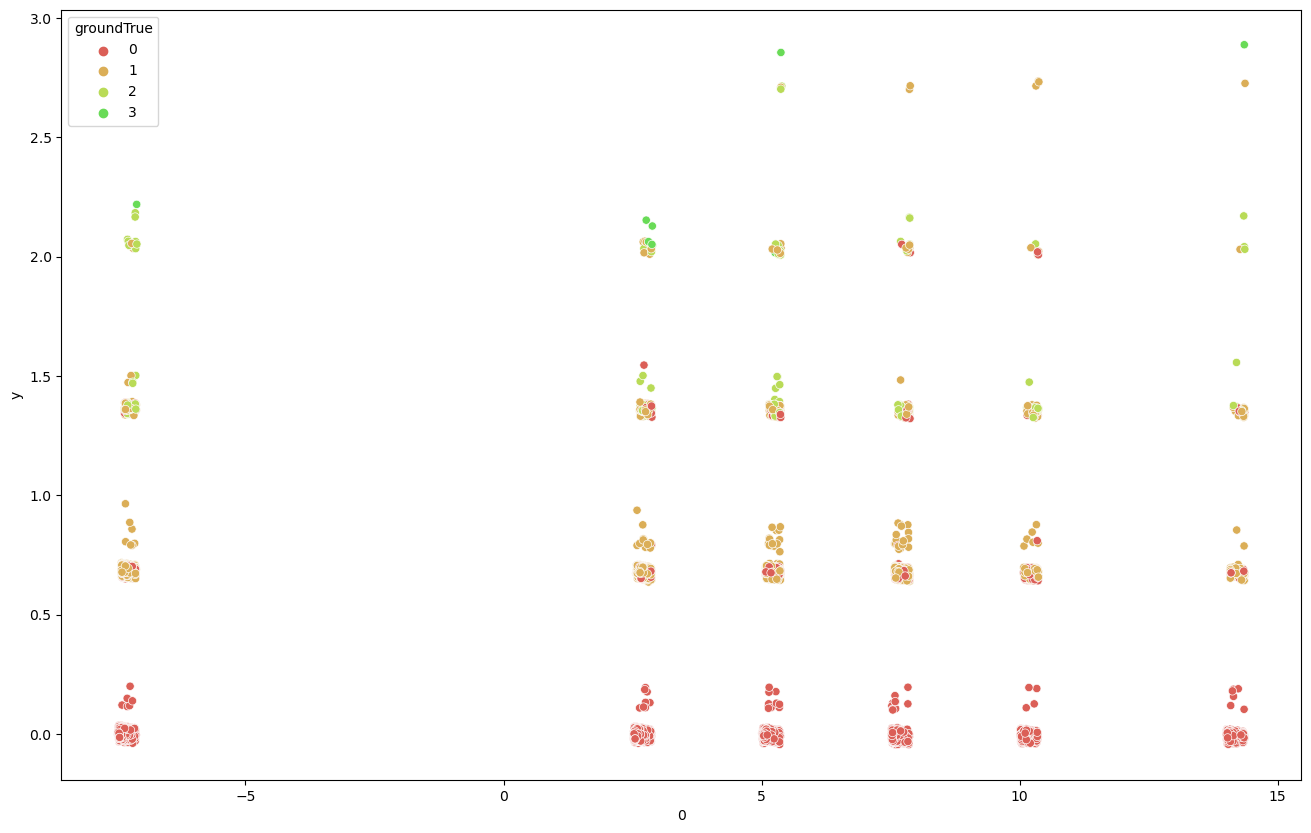

In [49]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=1
)

In [50]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.72      0.99      0.84      3509
           2       0.42      0.18      0.25       192
           3       0.18      0.14      0.16        14

    accuracy                           0.96     31205
   macro avg       0.58      0.57      0.56     31205
weighted avg       0.96      0.96      0.96     31205



In [23]:
svm_reg = LinearSVR(epsilon=0, C = 50, random_state=42)
svm_reg.fit(x, y)
result = svm_reg.predict(testX)
mean_squared_error(result, testY)

/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.03733311379813369

In [24]:
hard_result = np.round(result)

print(classification_report(testY, hard_result))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27490
           1       0.72      0.99      0.84      3509
           2       0.42      0.18      0.25       192
           3       0.18      0.14      0.16        14

    accuracy                           0.96     31205
   macro avg       0.58      0.57      0.56     31205
weighted avg       0.96      0.96      0.96     31205



In [25]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(testX)

df = pd.DataFrame(pca_result)
df['y'] = result
df['groundTrue'] = testY 


<AxesSubplot:xlabel='0', ylabel='y'>

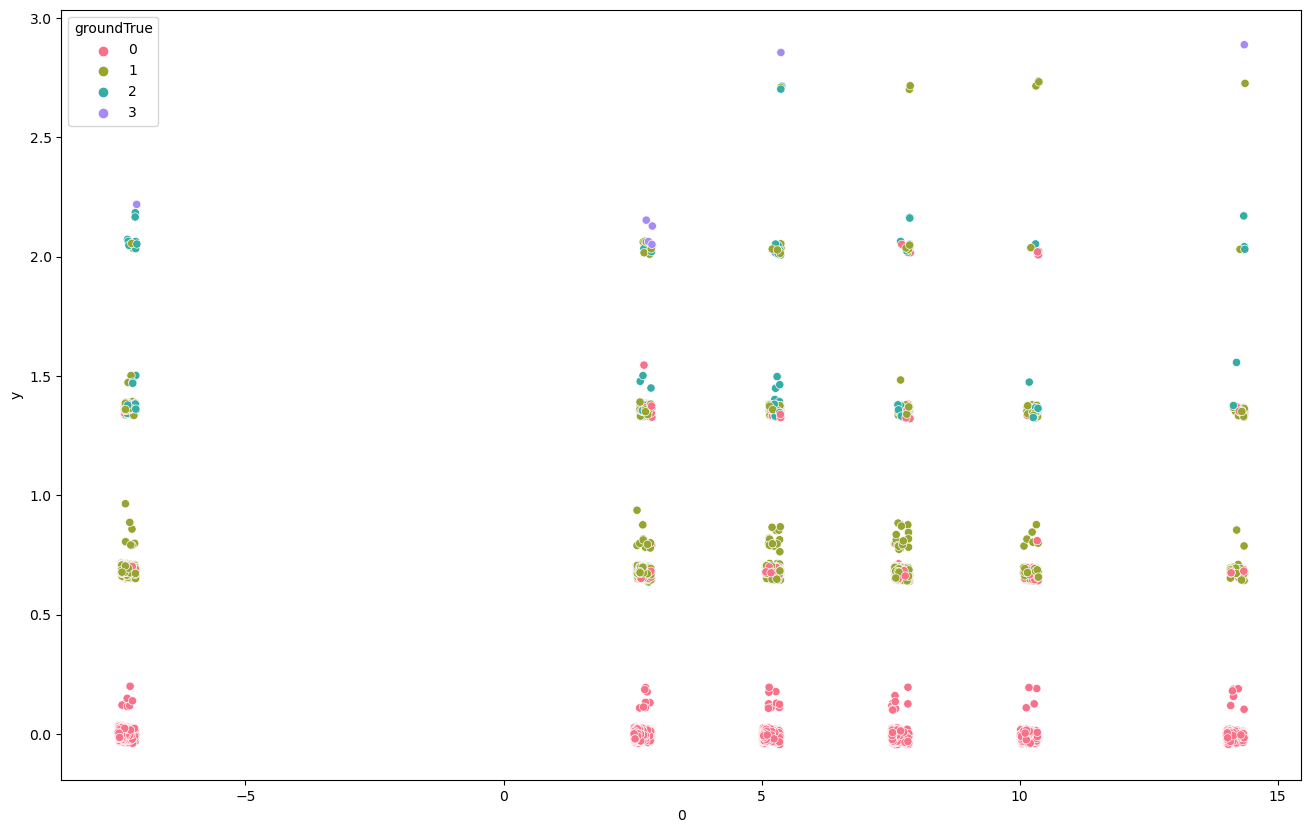

In [26]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y='y',
    hue="groundTrue",
    palette=sns.color_palette("husl", 4),
    data=df,
    legend="full",
    alpha=1
)

In [17]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [60]:
pca = PCA(n_components=1)
pca_train_result = pca.fit_transform(x)

svm_reg = LinearSVR(epsilon=0, C = 10, random_state=42)
svm_reg.fit(pca_train_result, y)

pca_test_result = pca.transform(testX)
result = svm_reg.predict(pca_test_result)
print(mean_squared_error(result, testY))

svm_reg.support_ = find_support_vectors(svm_reg, pca_test_result, testY)

0.33661271866580017


/home/sea120424/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)



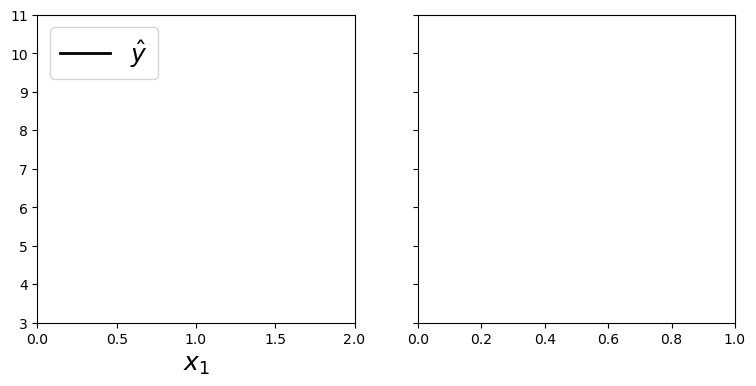

In [62]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, pca_test_result, testY, [])